# ACT 1  Efficacité et performance d'un algorithme

# 1. Validité d'un algorithme

Quand un programme contient une boucle, il convient de savoir si il fait bien ce qui est attendu. On parle de s'assurer de la ***validité*** de l'algorithme en répondant aux questions : 
1. Va-t-on bien sortir de la boucle au bout d'un certain temps ? **TERMINAISON**
2. Les valeurs obtenues au final sont-elles celles attendues ?  **INVARIANT DE BOUCLE**


##  Invariant de boucle
Un invariant de boucle est une **propriété attachée à la boucle, qui est vraie initialement, avant de commencer à exécuter la boucle, et maintenue vraie pour toute itération de la boucle** (d'où son nom). Elle sera en particulier vraie à la sortie de la boucle.

***Exemple :***
Voici un algorithme de calcul du produit de deux nombres avec un boucle conditionnelle et deux variables a et b ayant pour valeur un entier naturel.

On peut montrer que *"p = m x b" est un invariant de cette boucle.*

 - Avant le premier passage, p = 0 et m = 0, donc on a bien p = m x b.

- Supposons que p = m x b avant un passage dans la boucle : 

Les nouvelles de m et p après une boucle sont m' = m + 1 et p' = p + b. 

On a m' x b = (m + 1) x b = m x b + b = p + b = p'.

- La propriété est donc vérifiée après passage dans la boucle.

**Cette propriété est bien un invariant de boucle**, donc elle est vraie à la sortie de la boucle. Or à la sortie de la boucle, on a m = a , donc p = a x b.
Cette boucle permet donc le calcul des produit a et b (stocké dans p).

## Terminaison

Un algorithme ne doit toujours comporter qu'un nombre fini d'étapes. Dans le cas de boucles non conditionnelles (boucle ```for```), le nombre d'étapes est déterminé, donc fini.

Dans le cas de boucles conditionnelles (boucle ```while```), on utilise la notion de **variant** : on choisit un variant, c'est-à-dire une expression (souvent une variable) telle que la suite des valeurs de cette expression au cours des itérations prend, à un moment donné, une valeur satisfaisant la condition d'arrêt.

***Exemple :***
Considérons le code suivant

In [1]:
a = 10
x = 0
while x**2 < a:
    x = x + 1

Si la valeur de a est négative ou nulle, il n'y a aucun passage dans la boucle.
Sinon, la suite des valeurs de la variable x est 0 , 1 , 2 ... , n, où n est la première valeur supérieure ou égale à la racine carrée de la valeur de a. En considérant le variant x, on peut donc conclure que le nombre de passages dans la boucle est bien fini.

## Application

1) Reprendre l'exemple du produit de deux nombres étudié plus haut et montrer la terminaison de la boucle.

2) On effectue la division euclidienne de a par b, ou a et b sont deux entiers strictement positifs. Il s'agit donc de déterminer deux entiers q et r tels que : 
a = bq + r avec 0 <= r < b, dont on donne l'algorithme ci-dessous :

 - Prouver que a = bq + r est un invariant de boucle.
 - Prouver la terminaison de l'algorithme.
 
<i> Vous pouvez utiliser <a href ="http://pythontutor.com/visualize.html#mode=display"> Pythontutor </a> pour visualiser les opérations </i>

# 2. Comparaisons

Pour calculer la valeur de **x^n** on dispose des deux fonctions suivantes :

In [7]:
def puissance1(x, n):
    """ Renvoie x^n, pour n entier """
    p = 1
    for i in range(1, n+1):
        p = p * x
    return p

In [8]:
def puissance2(x, n):
    """ Renvoie x^n, pour n entier """
    p = 1
    while n > 0:
        if n%2 != 0:
            p = p * x
        x = x * x
        n = n // 2
    return p

128

## Questions :

1) Tester les programmes pour des valeurs connues.

2) Mettre en place un compteur pour afficher le nombre de boucles et le tester dans les cas ci-dessous :

|Valeur x|Valeur n|Nombre de boucles puissance1|Nombre de boucles puissance2|
|:-:|:-:|:-:|:-:|
|2|10|||
|2|100|||
|2|1000|||
|2|10000|||

3) Que peut-on dire de la *performance* de ces deux algorithmes ?

4) Pourquoi peut-on parler d'évaluer le ***coût mémoire*** pour comparer ces deux alogorithmes ?

# 2. Coût temporel et complexité

Pour choisir un algorithme plutôt qu'un autre on peut évaluer ses performances temporelles. On parle alors de ***coût temporel*** d'un algorithme.

## Temps de calcul
On étudie ici l'exemple de la multiplication de 2 nombres :

In [30]:
from time import time

start = time() # temps au début de l'exécution

# Exécution du programme
a = 10
b = 10
m = 0
p = 0
while m < a:
    m = m + 1
    p = p + b
    
end = time() # temps à la fin de l'exécution
end - start  # Affiche la durée d'exécution

0.20372343063354492

Voici un exemple de résultats obtenus pour ```b = 10``` :

|Valeur a|Durée en s|
|:-:|:-:|
|10|0.00022|
|100|0.00022|
|1000|0.00039|
|10000|0.00260|
|100000|0.02013|
|100000|0.20372|

On constate que la durée d'exécution évolue en fonction de la taille du nombre à multiplier : **plus le nombre et grand, plus le temps de calcul est important !**


## Calcul de complexité temporelle

On reprend le programme précédent et on y ajoute un compteur d'affectations :

In [31]:
N = 0  # compteur d'affectations initialisé
a = 100000
b = 10
m = 0
p = 0
N = N + 4  # 4 affectations à ce niveau
while m < a:
    m = m + 1
    N = N + 1  # 1 affectation par passage dans la boucle
print(N)

100004


Après quelques tests, on trouve que ```N = 2a + 4```

La boucle est effectuée exactement **a** fois, et il y a 2 affectations par boucle, donc **2a** affectations en tout et on initialise avec 4 affectations.

Le nombre d'opérations est donc encore proportionnel à **a** : on dit que le cout est <b>LINEAIRE</b>.

On parlera de coût linéaire dès lors que le nombre d'opérations est représenté par une fonction affine en fonction de la taille des données.

Le coût temporel est représenté par l'ordre de grandeur de la complexité s'écrit alors **O(a)**.

***Remarque :***
Ce coût dit *linéaire* est en réalité un fonction affine... L'ordre de grandeur de la complexité ne prend en compte que le terme de plus haut degré du polynôme :
```N = 2a + 4 ~  2a ~ a```

In [3]:
def appartient2(v, t):
    for i in range(len(t)):
        if t[i] == v:
            trouvee = True
        else:
            trouvee = False
    return trouvee

In [2]:
def appartient1(v, t):
    i = 0
    while i < len(t)-1 and t[i] != v:
        i = i + 1
    return i < len(t)

In [8]:
def appartient3(v, t):
    """ Fct correcte 
        Renvoie True si v appartient à t, False sinon """
    i = 0
    trouvee = False
    while i < len(t)-1:
        if t[i] == v:
            i = len(t)
            trouvee = True
        else:
            i = i + 1
    return trouvee

<h1> 2. Coût d'un algorithme </h1>

Quand on écrit un algorithme, on doit réfléchir pour qu'il soit le plus efficace possible. On doit notamment se poser la question de son temps d'exécution. Si on traite une liste de 10^7 valeurs, puis une liste de 10^8 valeurs, le temps de traitement sera-t-il multiplié par 10 ? Ce coût dépend de l'algorithme, de la liste, de la machine, et même du langage utilisé.

Pour comparer deux algorithmes, on cherche à déterminer l'ordre de grandeur de ce coût en fonction de la taille des données. On parle de **complexité d'un algorithme**.
Pour évaluer cette complexité, **on se place toujours dans le "pire des cas"**, c'est-à-dire qu'on compte le nombre maximum d'opérations.

Reprenons l'exemple de la multiplication, dont le code est donné ci-dessous. On y a ajouté un "timer" pour déterminer le **temps d'exécution** du programme.

Tester ce programme pour différentes valeurs de a. Que remarquez-vous ?

Le temps de calcul est proportionnel à a : on dit alors que le coût est <b>LINEAIRE</b>. 

Le coût en temps est accessible également par le **nombre d'affectations** car c'est *ce qui coûte* en ressources pour la machine (les tests étant négligeables). On peut estimer son ordre de grandeur en insérant un compteur :

## Applications

1) Ecrire un programme permettant de calculer la somme des entiers de 1 à n. Le tester pour différentes valeurs de n. Vérifier que son coût est linéaire en comptant les opérations effectuées.

2) On considère le programme ci-dessous. 


In [12]:
x = 0
n = 100
for i in range(n):
    x = x + i
    for j in range(n):
        x = x + j

0.001049041748046875


 - Le tester pour différentes valeurs de n. Noter ces valeurs et le temps correspondant.
 - Utiliser le programme ci-dessous pour visualiser le nuage de points ```(n, durée(n))```. 
 - On parle ici de coût quadratique (fonction du second degré) : est-ce correct ?
 - Ajouter un compteur d'affectations pour avoir le nombre d'opérations en fonction de n.

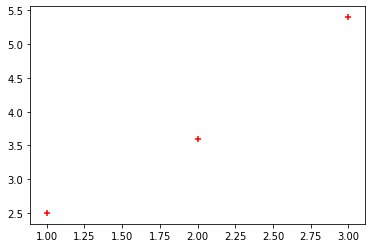

In [34]:
from matplotlib import pyplot as plt

# Exemple d'affichage Y en fct de X
X = [1, 2, 3]
Y = [2.5, 3.6, 5.4]
plt.scatter(X, Y, marker="+", color="red")
plt.show()

# 3. Cas du parcours 

On va étudier ici quelques algorithmes nécessitant de parcourir une liste (on peut également parcourir un tuple). Le parcours séquentiel consiste à parcourir la liste élément par élément, en suivant l'ordre des éléments.

<h3> exemple 1 : calcul d'une moyenne </h3>

1) Ecrire une fonction permettant de calculer la moyenne d'une liste de nombres.

2) Tracer la courbe représentant la durée d'exécution en fonction du nombre d'éléments de la liste.

3) En déduire la complexité temporelle **O()**.

<h3> exemple 2 : recherche d'une occurence </h3>
On cherche ici à rechercher de manière séquentielle la présence d'une valeur dans un tableau, qui peut être une liste, un tuple, ou une chaîne de caractères. 
On cherche une valeur ou un carctère précis, en le comparant à toutes les valeurs du tableau.

In [13]:
def recherche(x , tab):
    n = len(tab)
    i = 0
    while i < n and x != tab[i]:
        i = i + 1
    if i < n:
        return i

In [14]:
def recherche2(x ,tab):
    for i in range(len(tab)):
        if tab[i] == x:
            return i

1) Etudier ces deux programmes, et déterminer leur coût temporel ainsi que leur complexité **O()**. 

2) En déduire celui le plus performant.

# 4. Exercices d'application 

<b> Exercice 1 </b> : 
On attribue un numéro à divers personnages. Ceci se traduit par la liste Pers = [['Julie' , 1] , ['Tom' , 2] , ['Sam' , 3] , ['Lea' , 4] , ['Charlie' , 5]].
Ecrire une fonction qui permet de rechercher de manière séquentielle si un personnage de numéro x (entier) quelconque est présent dans la liste. Cette fonction doit renvoyer le nom du personnage en question s'il est présent dans la liste, False sinon.

<b> Exercice 2 </b> : On veut écrire une fonction verifie_tri qui prend en paramètres une liste d'entiers et qui renvoie True si la liste est correctement triée dans l'ordre croissant et False sinon.
Proposer des tests pour cette fonction, puis écrire son code.

<b> Exercice 3 </b> : Ecrire une fonction permute qui prend en argument une liste de mots et modifie la liste en permutant le mot le plus court en nombre de lettres  avec le premier mot de la liste. La fonction ne renvoie rien.

<b> Exercice 4 </b> : Ecrire un programme pour rechercher un mot dans un texte. Le mot et le texte sont des variables de type str. Etudier le coût de l'algorithme en fonction de la longueur du texte et de celle du mot.
    